In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import numpy as np

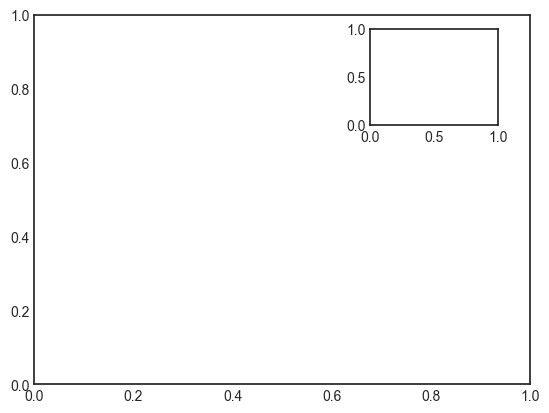

In [ ]:
# 先正常設定
ax1 = plt.axes()
# 再用正常設定的相對比例去指定 [bottom, left, width, height]
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

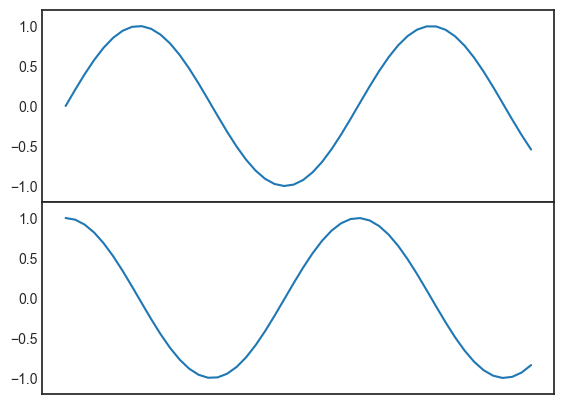

In [4]:
# 建立垂直堆疊的axes
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

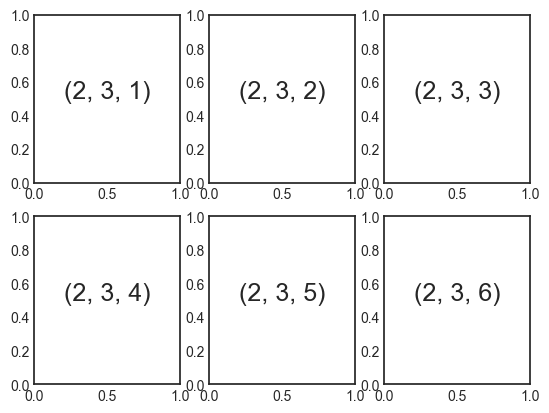

In [5]:
# 格式相同的子圖 通常會使用迴圈建立
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

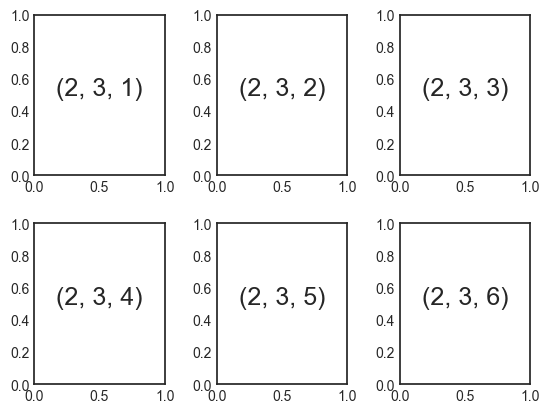

In [ ]:
# 調整子圖間的間距 單位為子圖的相對尺寸
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax. text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

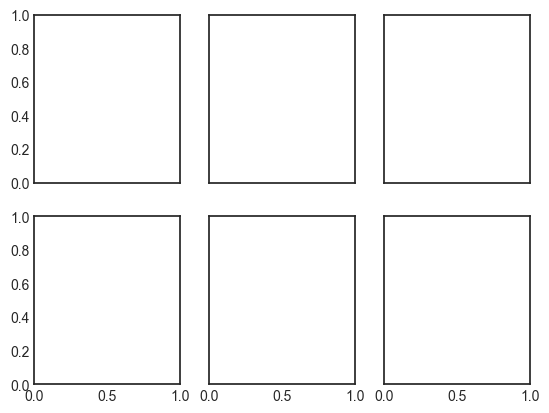

In [8]:
# plt.subplots() 範例
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

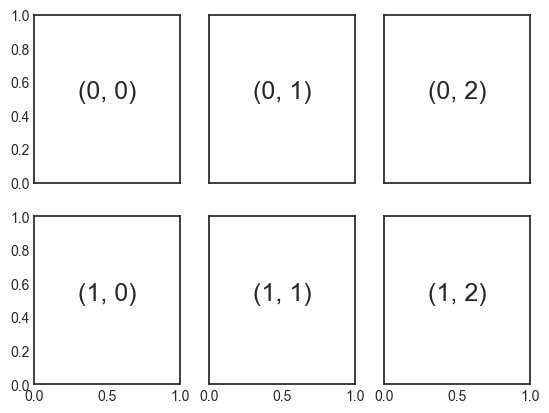

In [9]:
# 修改axes 內容
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

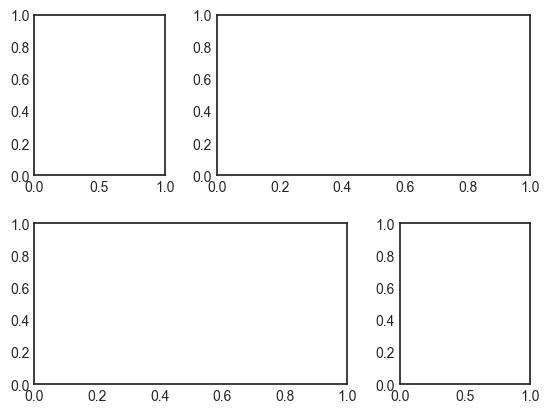

In [10]:
# 使用 plt.GridSpec() 指定網格規模
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

# plt.subplt() 即可使用切片 指定子圖位置
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);

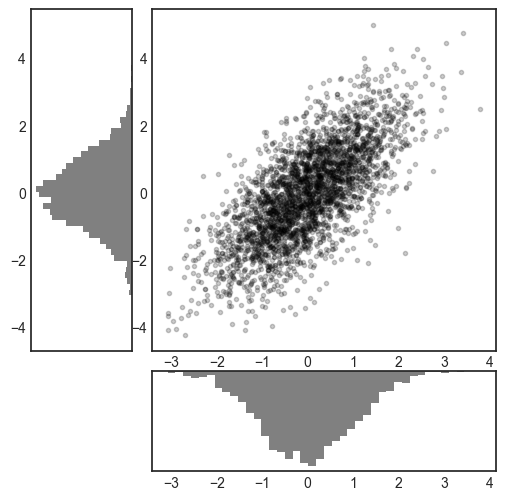

In [11]:
# 多軸直方圖的範例
# 建立一些常態分布資料
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# 使用 GridSpec 設置 axes
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 在主要的axes 上繪製散佈點
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 在附加的axes 上加上直方圖
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(x, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()